Credit Risk Dataset Features:
* person_age: Kişinin yaşı (Age)
* person_income: Kişinin yıllık geliri (Annual Income)
* person_home_ownership: Kişinin ev sahipliği durumu (Home ownership)
* person_emp_length: Kişinin yıllık olarak çalıştığı süre (Employment length (in years))
* loan_intent:	Kişinin kredi alma amacı (Loan intent)
* loan_grade: Kişinin kredi notu (Loan grade)
* loan_amnt: Kişinin aldığı kredi miktarı (Loan amount)
* loan_int_rate: Kredi için uygulanan faiz oranı (Interest rate)
* loan_status: Kredi durumu (0 ise temerrüde düşmemiş, 1 ise temerrüde düşmüş) (Loan status (0 is non default 1 is default))
* loan_percent_income: Kredi miktarının yıllık gelire oranı (Percent income)
* cb_person_default_on_file: Kişinin geçmişte temerrüde düşüp düşmediği (Historical default)
* cb_preson_cred_hist_length: Kişinin kredi geçmişinin süresi (Credit history length)


Kaynak(Source): https://www.kaggle.com/datasets/laotse/credit-risk-dataset

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [2]:
# !pip install nbimporter

In [3]:
df = pd.read_csv("credit_risk_dataset.csv")
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [4]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [5]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_df(df)

##################### Shape #####################
(32581, 12)
##################### Types #####################
person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object
##################### Head #####################
   person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4   

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,32581.0,27.734600,6.348078,20.00,23.00,26.00,30.00,144.00
person_income,32581.0,66074.848470,61983.119168,4000.00,38500.00,55000.00,79200.00,6000000.00
person_emp_length,31686.0,4.789686,4.142630,0.00,2.00,4.00,7.00,123.00
loan_amnt,32581.0,9589.371106,6322.086646,500.00,5000.00,8000.00,12200.00,35000.00
loan_int_rate,29465.0,11.011695,3.240459,5.42,7.90,10.99,13.47,23.22
loan_status,32581.0,0.218164,0.413006,0.00,0.00,0.00,0.00,1.00
loan_percent_income,32581.0,0.170203,0.106782,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,32581.0,5.804211,4.055001,2.00,3.00,4.00,8.00,30.00


In [7]:
def grab_col_names(df, cat_th=10, car_th=20):
    """

    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
    Not: Kategorik değişkenlerin içerisine numerik görünümlü kategorik değişkenler de dahildir.

    Parameters
    ------
        df: df
                Değişken isimleri alınmak istenilen df
        cat_th: int, optional
                numerik fakat kategorik olan değişkenler için sınıf eşik değeri
        car_th: int, optinal
                kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    ------
        cat_cols: list
                Kategorik değişken listesi
        num_cols: list
                Numerik değişken listesi
        cat_but_car: list
                Kategorik görünümlü kardinal değişken listesi

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = toplam değişken sayısı
        num_but_cat cat_cols'un içerisinde.
        Return olan 3 liste toplamı toplam değişken sayısına eşittir: cat_cols + num_cols + cat_but_car = değişken sayısı

    """


    # cat_cols, cat_but_car
    cat_cols = [col for col in df.columns if df[col].dtypes == "O"]
    num_but_cat = [col for col in df.columns if df[col].nunique() < cat_th and
                   df[col].dtypes != "O"]
    cat_but_car = [col for col in df.columns if df[col].nunique() > car_th and
                   df[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in df.columns if df[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {df.shape[0]}")
    print(f"Variables: {df.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car


cat_cols, num_cols, cat_but_car= grab_col_names(df)

Observations: 32581
Variables: 12
cat_cols: 5
num_cols: 7
cat_but_car: 0
num_but_cat: 1


#### Boş Değerler (Null Values)

In [8]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")

    if na_name:
        return na_columns


missing_values_table(df)

                   n_miss  ratio
loan_int_rate        3116   9.56
person_emp_length     895   2.75


In [9]:
def quick_missing_imp(data, num_method="median", cat_length=20, target=""):
    variables_with_na = [col for col in data.columns if data[col].isnull().sum() > 0]  # Eksik değere sahip olan değişkenler listelenir

    temp_target = data[target]

    print("# BEFORE")
    print(data[variables_with_na].isnull().sum(), "\n\n")  # Uygulama öncesi değişkenlerin eksik değerlerinin sayısı

    # değişken object ve sınıf sayısı cat_lengthe eşit veya altındaysa boş değerleri mode ile doldur
    data = data.apply(lambda x: x.fillna(x.mode()[0]) if (x.dtype == "O" and len(x.unique()) <= cat_length) else x, axis=0)

    # num_method mean ise tipi object olmayan değişkenlerin boş değerleri ortalama ile dolduruluyor
    if num_method == "mean":
        data = data.apply(lambda x: x.fillna(x.mean()) if x.dtype != "O" else x, axis=0)
    # num_method median ise tipi object olmayan değişkenlerin boş değerleri ortalama ile dolduruluyor
    elif num_method == "median":
        data = data.apply(lambda x: x.fillna(x.median()) if x.dtype != "O" else x, axis=0)

    data[target] = temp_target

    print("# AFTER \n Imputation method is 'MODE' for categorical variables!")
    print(" Imputation method is '" + num_method.upper() + "' for numeric variables! \n")
    print(data[variables_with_na].isnull().sum(), "\n\n")

    return data


df = quick_missing_imp(df,target="loan_status")

# BEFORE
person_emp_length     895
loan_int_rate        3116
dtype: int64 


# AFTER 
 Imputation method is 'MODE' for categorical variables!
 Imputation method is 'MEDIAN' for numeric variables! 

person_emp_length    0
loan_int_rate        0
dtype: int64 




#### Aykırı Değerler (Outliers)

In [10]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [11]:
num_ = ["person_age","person_emp_length"]
for col in num_:
    df = remove_outliers(df,col)

In [12]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

outlier_thresholds(df,num_cols,q1=0.05,q3=0.95)

(person_age                         1.00
 person_income                -145500.00
 person_emp_length                -16.50
 loan_amnt                     -30175.00
 loan_int_rate                     -9.36
 loan_percent_income               -0.47
 cb_person_cred_hist_length       -11.50
 dtype: float64,
 person_age                        57.00
 person_income                 303300.00
 person_emp_length                 27.50
 loan_amnt                      55625.00
 loan_int_rate                     31.68
 loan_percent_income                0.89
 cb_person_cred_hist_length        24.50
 dtype: float64)

In [13]:
def check_outlier(dataframe, col_name, q1=0.25, q3=0.75):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name, q1, q3)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False
    
def replace_with_thresholds(dataframe, variable, q1=0.25, q3=0.75):
    low_limit, up_limit = outlier_thresholds(dataframe, variable, q1, q3)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit


for col in num_cols:
    print(col,check_outlier(df,col,q1=0.05,q3=0.95))
    if check_outlier(df, col,q1=0.05,q3=0.95):
        replace_with_thresholds(df, col,q1=0.05,q3=0.95)

person_age False
person_income True
person_emp_length False
loan_amnt False
loan_int_rate False
loan_percent_income False
cb_person_cred_hist_length False


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,30392.0,26.647111,4.425236,20.00,23.00,25.00,29.00,40.00
person_income,30392.0,63985.023756,39282.644131,4080.00,38238.00,55000.00,78000.00,303300.00
person_emp_length,30392.0,4.417643,3.380452,0.00,2.00,4.00,7.00,14.00
loan_amnt,30392.0,9534.317419,6279.474453,500.00,5000.00,8000.00,12000.00,35000.00
loan_int_rate,30392.0,11.017091,3.077190,5.42,8.49,10.99,13.11,23.22
loan_status,30392.0,0.219564,0.413958,0.00,0.00,0.00,0.00,1.00
loan_percent_income,30392.0,0.170933,0.106805,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,30392.0,5.229534,3.282588,2.00,3.00,4.00,7.00,17.00


#### Dengesiz Veri Seti (Imbalanced Datasets)

C:\Users\seyma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


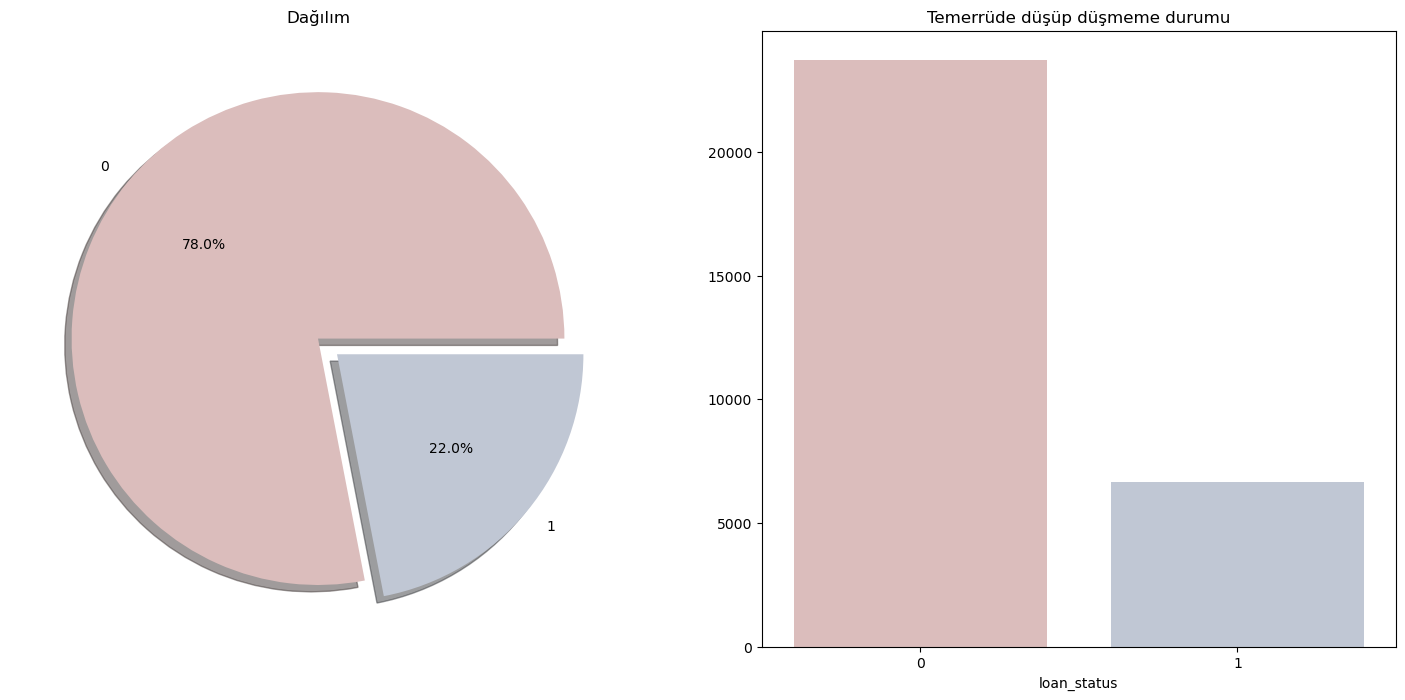

In [15]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df.loan_status.value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True,fontsize=10,colors=["#DBBDBC","#C0C7D4"])
ax[0].set_title('Dağılım', fontsize=12, weight='normal')
ax[0].set_ylabel('')
sns.countplot('loan_status',data=df,ax=ax[1],palette="vlag_r")
ax[1].set_title('Temerrüde düşüp düşmeme durumu', fontsize=12, weight='normal')
ax[1].set_xlabel('loan_status', fontsize=10)
ax[1].set_ylabel('', fontsize=10)
ax[1].tick_params(axis='x', labelsize=10)
ax[1].tick_params(axis='y', labelsize=10)
plt.show()

#### Veri Analizi (Data Analysis)

In [16]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [17]:
chart1_tbl = df.groupby("loan_intent")[["loan_amnt"]].mean().reset_index()

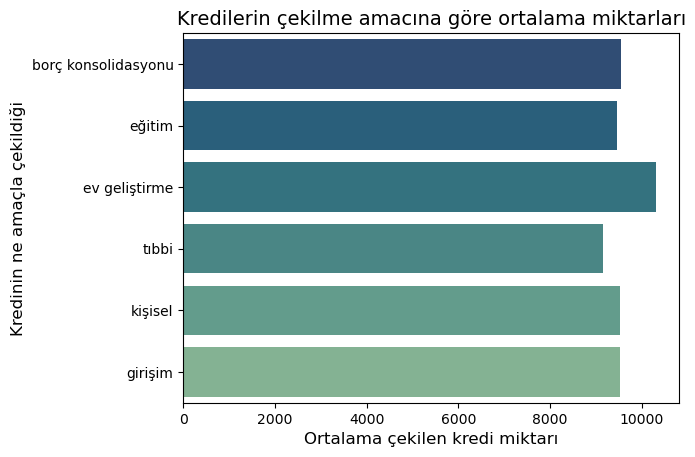

In [18]:
csb = sns.barplot(y="loan_intent",x="loan_amnt",data=chart1_tbl,palette="crest_r")

plt.xlabel("Ortalama çekilen kredi miktarı", fontsize=12, weight='normal')
plt.ylabel("Kredinin ne amaçla çekildiği", fontsize=12, weight='normal')
plt.title("Kredilerin çekilme amacına göre ortalama miktarları", fontsize=14, weight='normal')
csb.set_yticklabels(["borç konsolidasyonu", "eğitim", "ev geliştirme", "tıbbi", "kişisel", "girişim"], fontsize=10, weight='normal')
plt.xticks(fontsize=10,weight='normal')
plt.show()

In [19]:
bins = [0,25, 30, 35, 40]
labels = ['0-25', '26-30', '31-35', '36-40']

df['person_age_cat'] = pd.cut(df['person_age'], bins=bins, labels=labels)

In [20]:
df["total_pay_back"] = df.loan_amnt + (df.loan_amnt*(df.loan_int_rate/100))

In [21]:
bins = [0,500, 5000, 8000, 12000 ,35000]
labels = ['0-500', '501-5000', '5001-8000', '8001-12000',"12001-35000"]

df['loan_amnt_cat'] = pd.cut(df['loan_amnt'], bins=bins, labels=labels)

In [22]:
df.groupby(["loan_amnt_cat"])[["total_pay_back"]].mean().reset_index()

,loan_amnt_cat,total_pay_back
0,0-500,553.330000
1,501-5000,3852.634640
2,5001-8000,7495.653421
3,8001-12000,11458.153733
4,12001-35000,20637.801271


In [23]:
chart2_tbl = df.groupby(["loan_amnt_cat"])[["person_income"]].mean().reset_index()

In [24]:
chart2_tbl

,loan_amnt_cat,person_income
0,0-500,26080.800000
1,501-5000,49829.503924
2,5001-8000,57449.590339
3,8001-12000,65554.282095
4,12001-35000,85197.041987


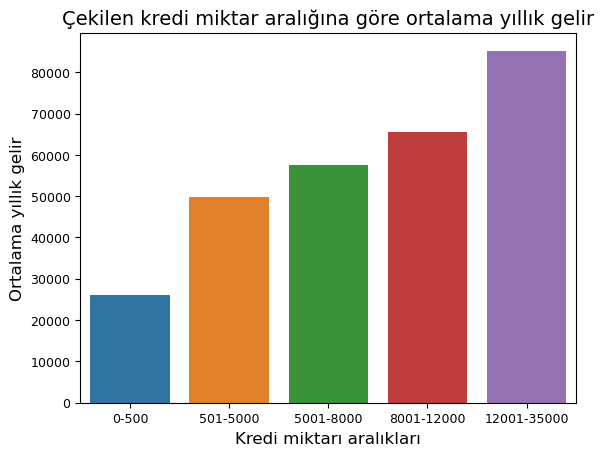

In [25]:
sns.barplot(x="loan_amnt_cat",y="person_income",data=chart2_tbl)

plt.xlabel("Kredi miktarı aralıkları",fontsize=12, weight='normal')
plt.ylabel("Ortalama yıllık gelir", fontsize=12, weight='normal')
plt.title("Çekilen kredi miktar aralığına göre ortalama yıllık gelir", fontsize=14, weight='normal')
plt.xticks(fontsize=9,weight="normal")
plt.yticks(fontsize=9,weight="normal")
plt.show()

C:\Users\seyma\AppData\Local\Temp\ipykernel_9196\573462431.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  csh.set_xticklabels(["kendi","ipotek","kira","diğer"], fontsize=10, weight='normal')


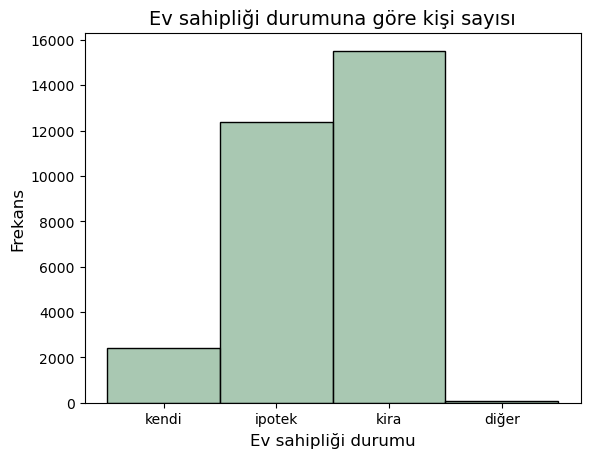

In [26]:
csh = sns.histplot(df.person_home_ownership,color="#8db699")
plt.xlabel("Ev sahipliği durumu",fontsize=12, weight='normal')
plt.ylabel("Frekans",fontsize=12, weight='normal')
plt.title("Ev sahipliği durumuna göre kişi sayısı",fontsize=14, weight='normal')
csh.set_xticklabels(["kendi","ipotek","kira","diğer"], fontsize=10, weight='normal')
plt.yticks(fontsize=10,weight='normal')
plt.show()

In [27]:
chart3_tbl = df.groupby(["loan_grade"])[["loan_amnt"]].mean().reset_index()
chart3_tbl

,loan_grade,loan_amnt
0,A,8511.744464
1,B,9918.636131
2,C,9201.356269
3,D,10737.496285
4,E,12734.668508
5,F,14556.900452
6,G,17256.355932


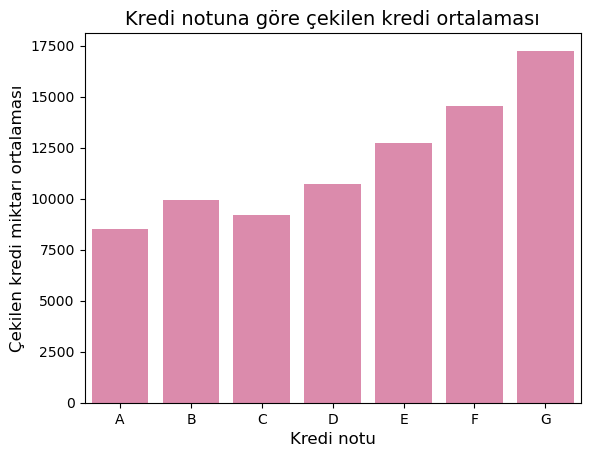

In [28]:
sns.barplot(x="loan_grade",y="loan_amnt",data=chart3_tbl,color="#e87eaa")
plt.xlabel("Kredi notu",fontsize=12, weight='normal')
plt.ylabel("Çekilen kredi miktarı ortalaması",fontsize=12, weight='normal')
plt.title("Kredi notuna göre çekilen kredi ortalaması",fontsize=14, weight='normal')
plt.xticks(fontsize=10,weight='normal')
plt.yticks(fontsize=10,weight='normal')
plt.show()

In [29]:
chart4_tbl = df.groupby(["loan_grade"])[["loan_int_rate"]].mean().reset_index()
chart4_tbl

,loan_grade,loan_int_rate
0,A,7.675307
1,B,10.997822
2,C,13.232337
3,D,14.984437
4,E,16.474000
5,F,17.783575
6,G,19.756102


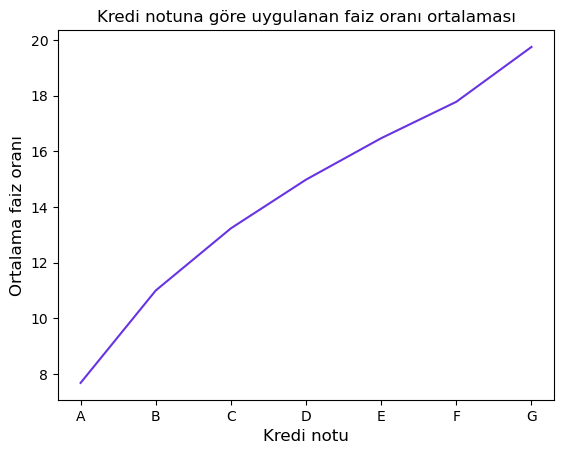

In [30]:
sns.lineplot(x="loan_grade",y="loan_int_rate",data=chart4_tbl,color="#6834e2")
plt.xlabel("Kredi notu",fontsize=12, weight='normal')
plt.ylabel("Ortalama faiz oranı",fontsize=12, weight='normal')
plt.title("Kredi notuna göre uygulanan faiz oranı ortalaması",fontsize=12, weight='normal')
plt.xticks(fontsize=10,weight='normal')
plt.yticks(fontsize=10,weight='normal')
plt.show()

In [31]:
chart5_tbl = df.groupby(["person_age_cat"])[["person_emp_length"]].mean().reset_index()
chart5_tbl

,person_age_cat,person_emp_length
0,0-25,4.031987
1,26-30,5.120330
2,31-35,4.277068
3,36-40,4.314773


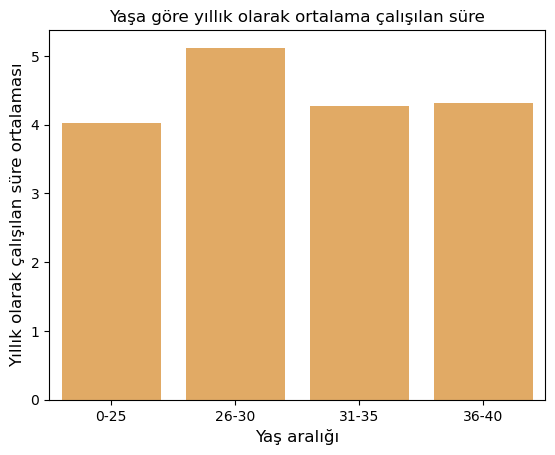

In [32]:
sns.barplot(x="person_age_cat",y="person_emp_length",data=chart5_tbl,color="#f6ac50")
plt.xlabel("Yaş aralığı",fontsize=12, weight='normal')
plt.ylabel("Yıllık olarak çalışılan süre ortalaması",fontsize=12, weight='normal')
plt.title("Yaşa göre yıllık olarak ortalama çalışılan süre",fontsize=12, weight='normal')
plt.xticks(fontsize=10,weight='normal')
plt.yticks(fontsize=10,weight='normal')
plt.show()

In [33]:
df_copy = df.copy()

##### Encoding

In [37]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

binary_cols = [col for col in df_copy.columns if df_copy[col].dtypes == "O" and df_copy[col].nunique() == 2]

for col in binary_cols:
    if col != "loan_status":
        df_copy=label_encoder(df_copy,col)

In [38]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

ohe_cols = [col for col in df_copy.columns if 10 >= df_copy[col].nunique() > 2]

df_copy = one_hot_encoder(df_copy, ohe_cols, drop_first=True)

##### MODEL

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_validate, RandomizedSearchCV, validation_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.pipeline import Pipeline

In [40]:
X = df_copy.drop(["loan_status"], axis=1)
y = df_copy["loan_status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 17)

In [41]:
df_copy

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,total_pay_back,...,loan_grade_E,loan_grade_F,loan_grade_G,person_age_cat_26-30,person_age_cat_31-35,person_age_cat_36-40,loan_amnt_cat_501-5000,loan_amnt_cat_5001-8000,loan_amnt_cat_8001-12000,loan_amnt_cat_12001-35000
1,21,9600,5.0,1000,11.14,0,0.10,0,2,1111.40,...,0,0,0,0,0,0,1,0,0,0
2,25,9600,1.0,5500,12.87,1,0.57,0,3,6207.85,...,0,0,0,0,0,0,0,1,0,0
3,23,65500,4.0,35000,15.23,1,0.53,0,2,40330.50,...,0,0,0,0,0,0,0,0,0,1
4,24,54400,8.0,35000,14.27,1,0.55,1,4,39994.50,...,0,0,0,0,0,0,0,0,0,1
5,21,9900,2.0,2500,7.14,1,0.25,0,2,2678.50,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32289,40,33000,2.0,1000,10.99,0,0.03,0,15,1109.90,...,0,0,0,0,0,1,1,0,0,0
32290,37,90000,11.0,4000,6.62,0,0.04,0,15,4264.80,...,0,0,0,0,0,1,1,0,0,0
32292,38,200000,0.0,3000,7.68,0,0.01,0,12,3230.40,...,0,0,0,0,0,1,1,0,0,0
32293,38,110000,5.0,16000,11.99,0,0.15,0,13,17918.40,...,0,0,0,0,0,1,0,0,0,1


In [43]:
rs = RobustScaler()
X_train = rs.fit_transform(X_train)
X_test = rs.transform(X_test)

In [44]:
models = [('LR', LogisticRegression(random_state=12345)),
           ('KNN', KNeighborsClassifier()),
          ('CART', DecisionTreeClassifier(random_state=12345)),
           ('RF', RandomForestClassifier(random_state=12345)),
          ('GBM', GradientBoostingClassifier(random_state=12345)),
          ("XGBoost", XGBClassifier(random_state=12345)),
          ("LightGBM", LGBMClassifier(random_state=12345,verbose=-1)),
          ("CatBoost", CatBoostClassifier(verbose=False,random_state=12345))]


In [45]:
for name, model in models:
    cv_results = cross_validate(model, X, y, cv=5, scoring=["accuracy","f1"])
    print(f"########## {name} ##########")
    print(f"Accuracy: {round(cv_results['test_accuracy'].mean(), 4)}")
    print(f"F1-Score: {round(cv_results['test_f1'].mean(), 4)}")

########## LR ##########
Accuracy: 0.8167
F1-Score: 0.4081


C:\Users\seyma\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\seyma\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

########## KNN ##########
Accuracy: 0.8176
F1-Score: 0.5241
########## CART ##########
Accuracy: 0.8586
F1-Score: 0.7047
########## RF ##########
Accuracy: 0.9203
F1-Score: 0.7956
########## GBM ##########
Accuracy: 0.914
F1-Score: 0.7743
########## XGBoost ##########
Accuracy: 0.914
F1-Score: 0.789
########## LightGBM ##########
Accuracy: 0.9208
F1-Score: 0.7986
########## CatBoost ##########
Accuracy: 0.9259
F1-Score: 0.8111


In [46]:
param = {'colsample_bytree': 0.75,
 'learning_rate': 0.29,
 'max_depth': 11,
 'min_child_weight': 0.04,
 'num_leaves': 1667,
 'subsample': 0.65}

In [ ]:
# param = {'colsample_bytree': 0.7532132843591004,
#  'learning_rate': 0.2898666154077256,
#  'max_depth': 11,
#  'min_child_weight': 0.03475168869364115,
#  'num_leaves': 1667,
#  'subsample': 0.6452369742042998}

In [47]:
lgbm_model = LGBMClassifier(**param,random_state=42,verbose=-1).fit(X_train,y_train)

In [48]:
y_pred = lgbm_model.predict(X_test)

In [49]:
from sklearn.metrics import f1_score

f1_ = f1_score(y_test,y_pred)
print(f"F1: {f1_:.4f}")

F1: 0.8346


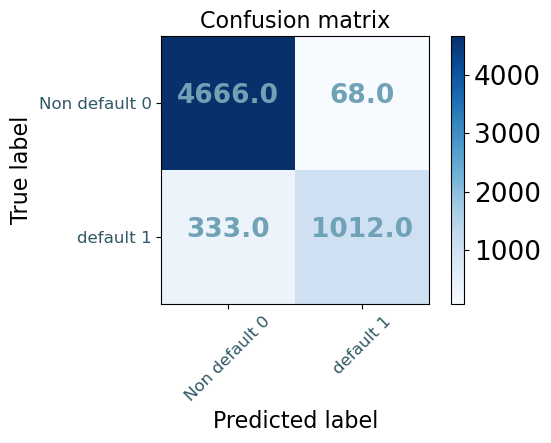

In [50]:
from sklearn.metrics import confusion_matrix ,classification_report
from matplotlib import rc,rcParams
import numpy as np 
import itertools

def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.rcParams.update({'font.size': 19})
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title,fontdict={'size':'16'})
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45,fontsize=12,color="#2f5866")
    plt.yticks(tick_marks, classes,fontsize=12,color="#2f5866")
    rc('font', weight='bold')
    fmt = '.1f'
    thresh = cm.max()
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="#70a2b6")

    plt.ylabel('True label',fontdict={'size':'16'})
    plt.xlabel('Predicted label',fontdict={'size':'16'})
    plt.tight_layout()

plot_confusion_matrix(confusion_matrix(y_test, y_pred=y_pred), classes=['Non default 0','default 1'],
                      title='Confusion matrix')

In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      4734
           1       0.94      0.75      0.83      1345

    accuracy                           0.93      6079
   macro avg       0.94      0.87      0.90      6079
weighted avg       0.93      0.93      0.93      6079



In [ ]:
# pip install scikit-optimize lightgbm

### Yeniden Örnekleme (Resampling)
#### Oversampling 

In [53]:
# pip install imblearn

##### SMOTE Oversampling

Overfitting’i önlemek için azınlık sınıfından sentetik örnekler oluşturulması.

* Önce azınlık sınıfından rastgele bir örnek seçilir.
* Daha sonra bu örnek için en yakın komşulardan k tanesi bulunur.
* k en yakın komşulardan biri rastgele seçilir ve azınlık sınıfından rastgele seçilen örnekle birleştirilip özellik uzayında bir çizgi parçası oluşturarak sentetik örnek oluşturulur.

In [52]:
y_train.value_counts()

0    18985
1     5328
Name: loan_status, dtype: int64

In [54]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(random_state=42)
X_smote, y_smote = oversample.fit_resample(X_train,y_train)

In [55]:
y_smote.value_counts()

0    18985
1    18985
Name: loan_status, dtype: int64

In [56]:
lgbm_model.fit(X_smote, y_smote)
y_pred_sro = lgbm_model.predict(X_test)

f1_sro = f1_score(y_test, y_pred_sro)
print("F1-Score: %.3f%%" % (f1_sro))

F1-Score: 0.838%


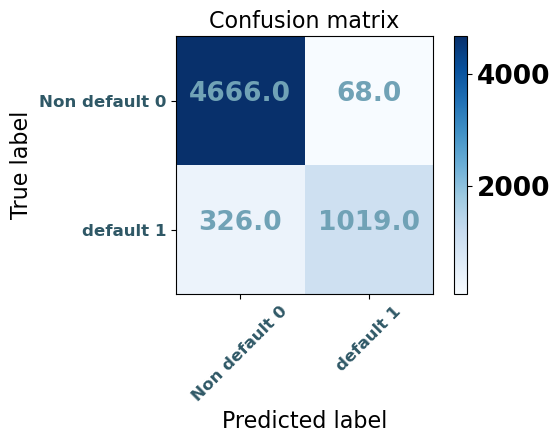

In [57]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred=y_pred_sro), classes=['Non default 0','default 1'],
                      title='Confusion matrix')

In [58]:
print(classification_report(y_test, y_pred_sro))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      4734
           1       0.94      0.76      0.84      1345

    accuracy                           0.94      6079
   macro avg       0.94      0.87      0.90      6079
weighted avg       0.94      0.94      0.93      6079

